# **Credit Card Fraud Detection**

Importing necessary Libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CodSoft Projects/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for missing values

In [ ]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Checking and removing duplicate values

In [ ]:
data.duplicated().sum()

1081

In [ ]:
data.drop_duplicates(inplace = True)

Checking whether the dataset is an imbalanced one

In [ ]:
data['Class'].value_counts()

,count
Class,
0,283253
1,473


Plotting Class Distribution

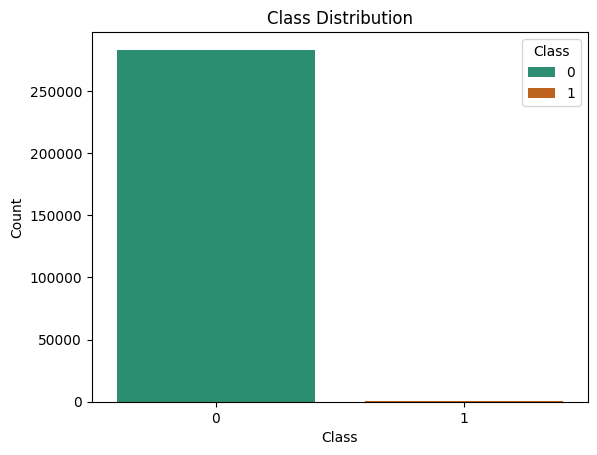

In [ ]:
sns.countplot(x='Class', data=data,palette = 'Dark2',hue = 'Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
corr = data.corr()

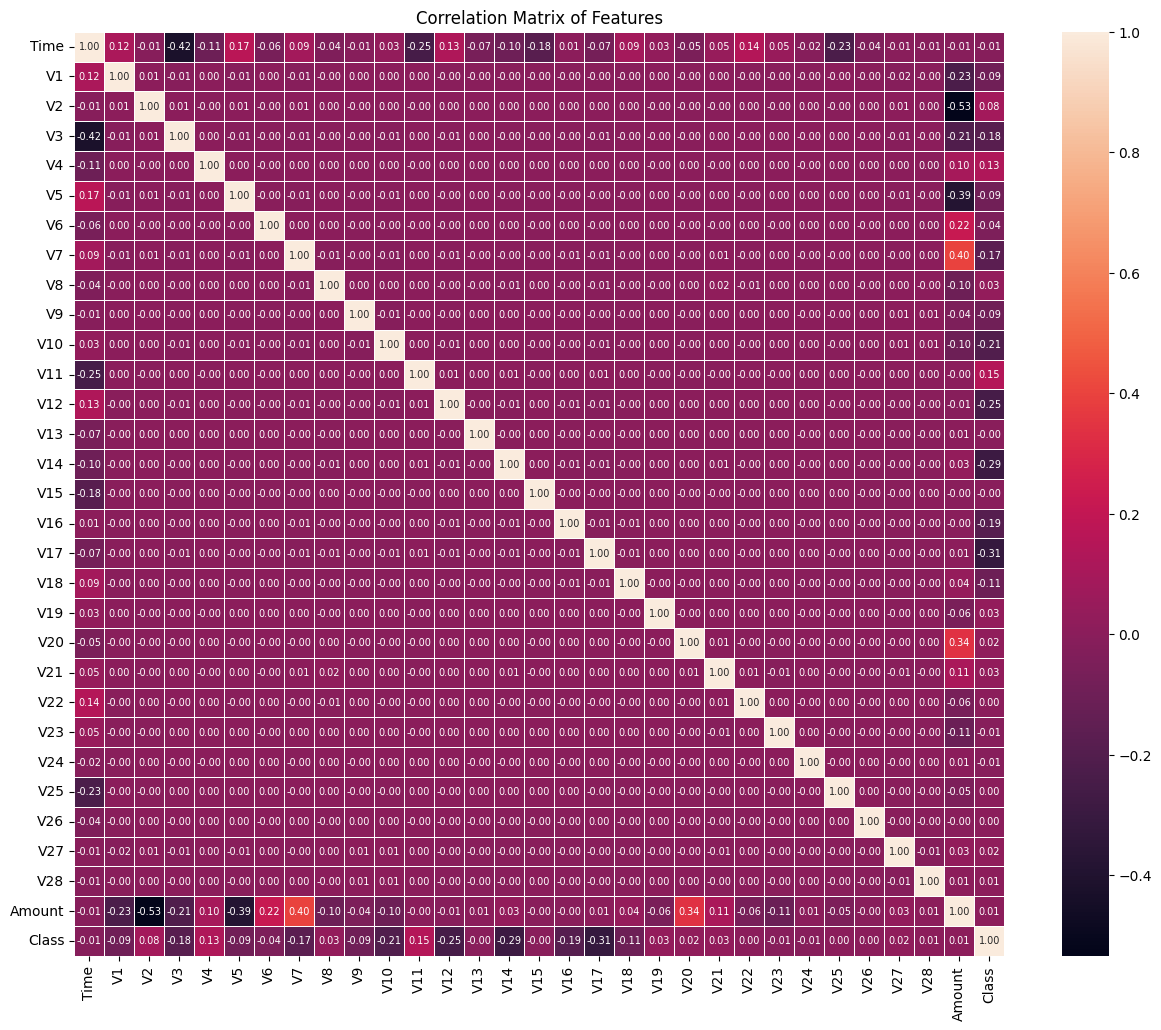

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

# Model Building

Selecting features for model building

In [ ]:
X = data.iloc[:,:-1]
y= data.iloc[:,-1]

Scaling the features using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

Importing the necessary classification algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()

Training the data

In [ ]:
dtm = dt.fit(X_train, y_train)
rfm = rf.fit(X_train, y_train)
xgbm = xgb.fit(X_train, y_train)

Predicting the data using the model

In [ ]:
ypred_dt = dtm.predict(X_test)
ypred_rf = rfm.predict(X_test)
ypred_xgb = xgbm.predict(X_test)

Accuracies of different models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
print("Accuracy Score of Decision Tree: ", accuracy_score(y_test, ypred_dt))
print("Accuracy Score of Random Forest: ", accuracy_score(y_test, ypred_rf))
print("Accuracy Score of XGBoost: ", accuracy_score(y_test, ypred_xgb))

Accuracy Score of Decision Tree:  0.9990836358509851
Accuracy Score of Random Forest:  0.9994713283755683
Accuracy Score of XGBoost:  0.9995065731505305


Classification report of different models

In [ ]:
print("Decision Tree",classification_report(y_test, ypred_dt))
print("Random Forest",classification_report(y_test, ypred_rf))
print("XGBoost",classification_report(y_test, ypred_xgb))

Decision Tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.73      0.73      0.73        95

    accuracy                           1.00     56746
   macro avg       0.86      0.86      0.86     56746
weighted avg       1.00      1.00      1.00     56746

Random Forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.72      0.82        95

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

XGBoost               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.95      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.87      0.92     56746
weighted avg       1.00      1.00     

Confusiom Matrix Displays

Confusion Matrix of Decision Tree: 


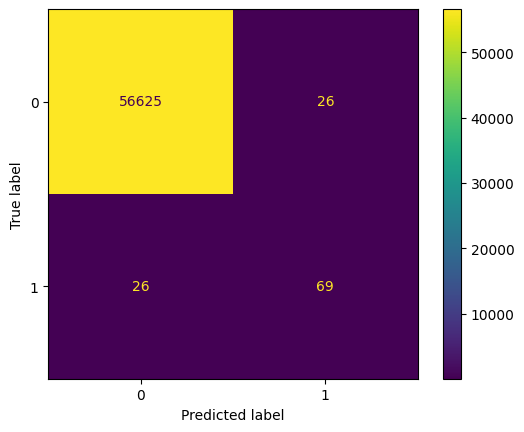

In [ ]:
print("Confusion Matrix of Decision Tree: ")
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred_dt))

Confusion Matrix of Random Forest: 


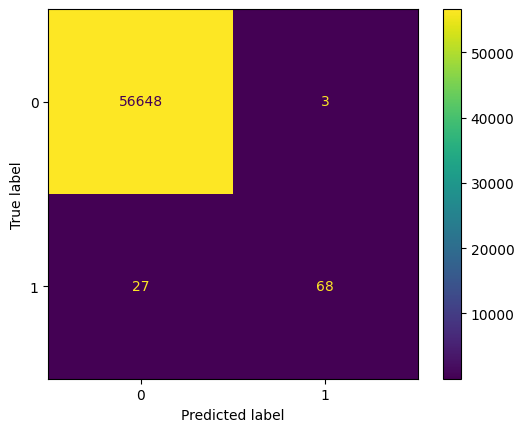

In [ ]:
print("Confusion Matrix of Random Forest: ")
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred_rf))

Confusion Matrix of XGBoost: 


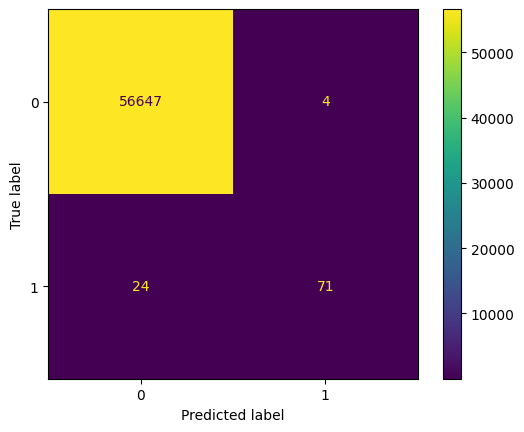

In [ ]:
print("Confusion Matrix of XGBoost: ")
print(ConfusionMatrixDisplay.from_predictions(y_test, ypred_xgb))

Since it is an imbalanced dataset, using SMOTE to make it a balanced one

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)

In [ ]:
y_smote.value_counts()

,count
Class,
0,283253
1,283253


Splitting the oversampled data

In [ ]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=18)

Model building the oversampled data

In [ ]:
dt_smote = dt.fit(X_smote_train, y_smote_train)
rf_smote = rf.fit(X_smote_train, y_smote_train)
xgb_smote = xgb.fit(X_smote_train, y_smote_train)

Prediciting

In [ ]:
ypred_dt_smote = dt_smote.predict(X_smote_test)
ypred_rf_smote = rf_smote.predict(X_smote_test)
ypred_xgb_smote = xgb_smote.predict(X_smote_test)

Performance Analysis

In [ ]:
print("Accuracy Score of Decision Tree OS: ", accuracy_score(y_smote_test, ypred_dt_smote))
print("Accuracy Score of Random Forest OS: ", accuracy_score(y_smote_test, ypred_rf_smote))
print("Accuracy Score of XGBoost OS: ", accuracy_score(y_smote_test, ypred_xgb_smote))

Accuracy Score of Decision Tree OS:  0.9980141568551305
Accuracy Score of Random Forest OS:  0.9998764364265414
Accuracy Score of XGBoost OS:  0.9996116573405589


In [ ]:
print("Classification report Decision Tree OS: ")
print(classification_report(y_smote_test,ypred_dt_smote))
print("Classification report Random Forest OS: ")
print(classification_report(y_smote_test, ypred_rf_smote))
print("Classification report XGBoost OS: ")
print(classification_report(y_smote_test, ypred_xgb_smote))

Classification report Decision Tree OS: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56689
           1       1.00      1.00      1.00     56613

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Classification report Random Forest OS: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56689
           1       1.00      1.00      1.00     56613

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

Classification report XGBoost OS: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56689
           1       1.00      1.00      1.00     56613

    accuracy                           1.00    113302
   macro av

Confusion Matrix of Decision Tree OS: 
Confusion Matrix of Random Forest OS: 
Confusion Matrix of XGBoost OS: 


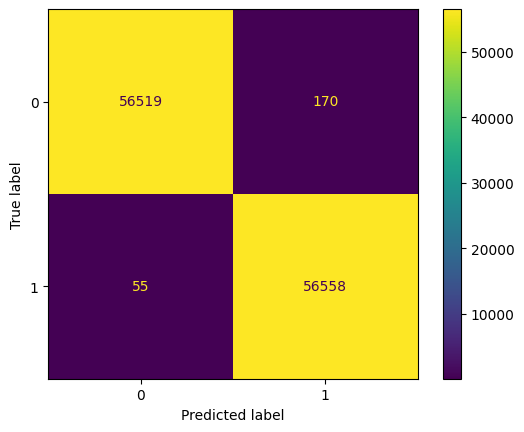

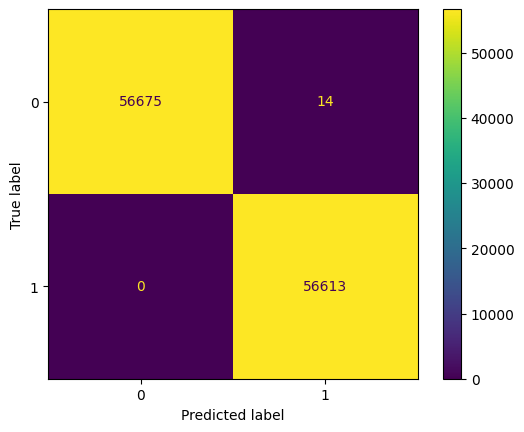

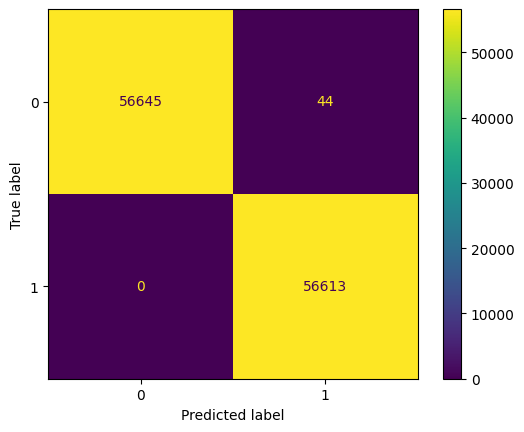

In [ ]:
print("Confusion Matrix of Decision Tree OS: ")
print(ConfusionMatrixDisplay.from_predictions(y_smote_test, ypred_dt_smote))

print("Confusion Matrix of Random Forest OS: ")
print(ConfusionMatrixDisplay.from_predictions(y_smote_test, ypred_rf_smote))

print("Confusion Matrix of XGBoost OS: ")
print(ConfusionMatrixDisplay.from_predictions(y_smote_test, ypred_xgb_smote))

In [ ]:
accuracy = pd.DataFrame({'Model':['Decision Tree','Random Forest','XGBoost'],'Accuracy':[accuracy_score(y_test, ypred_dt),accuracy_score(y_test, ypred_rf),accuracy_score(y_test, ypred_xgb)],'Accuracy OS':[accuracy_score(y_smote_test, ypred_dt_smote),accuracy_score(y_smote_test, ypred_rf_smote),accuracy_score(y_smote_test, ypred_xgb_smote)]})

Accuracy Comparison

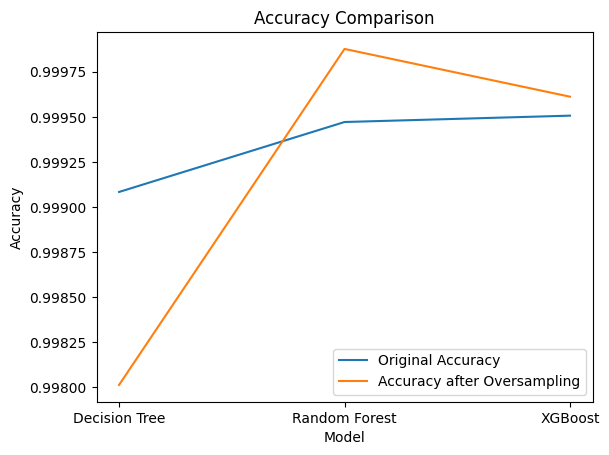

In [ ]:
plt.plot(accuracy['Model'], accuracy['Accuracy'], label='Original Accuracy')
plt.plot(accuracy['Model'], accuracy['Accuracy OS'], label='Accuracy after Oversampling')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()